<a href="https://colab.research.google.com/github/edelgado-1975/PandasOk/blob/main/02_Multiples_indices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiples indices

En esta seccion aprende a como trabajar un dataframe con multiples indices.

Un indice es un artificio en pandas que nos permite en pandas encontrar la ubicacion de un archivo o dato. Son las coordenadas en una dataframe.

La ventajas de utilizar multiples indices es que podemos aplicar funciones matematicas en diversos niveles.

Buscamos nuestro dataset descargado de [world bank](https://data.worldbank.org/). El mismo lo llamaremos [population.csv](https://data.worldbank.org/indicator/SP.POP.TOTL).

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/CienciaDataAplicadaEJDA/'
!ls

Empezamos a trabajar con el dataset

In [ ]:
import pandas as pd
import numpy as np

Hacemos un preprocesamiento y adecuamos el dataset a las necesidades el curso.

Utilizo **skiprows** para saltarme las filas que no aportan valor alguno para analizar el dataframe.

In [ ]:
df_pob = pd.read_csv('poblacion.csv',
                     skiprows=4)

In [ ]:
df_pob

In [ ]:
df_poblacion = df_pob.drop(columns=["Country Code","Indicator Name","Indicator Code","2019","Unnamed: 64"])
df_poblacion

Utilizamos el método **.melt()** para cambiar columnas por filas y reajustar el dataframe, como se ven en el siguiente ejemplo:

![alt text](https://miro.medium.com/max/700/1*KcNGMpinfFULBmqrFSI3OA@2x.png)

In [ ]:
df_poblacion = pd.melt(df_poblacion, id_vars=["Country Name"], var_name="year", value_name="pob")
df_poblacion


Especificamos el formato numerico

In [ ]:
pd.options.display.float_format = '{:,.1f}'.format
df_poblacion

Ahora vemos los tipos de datos que tenemos.

In [ ]:
df_poblacion.dtypes

Defino la variable year como  int64 para filtrar algunos años.

In [ ]:
df_poblacion['year'] = df_poblacion['year'].astype(str).astype(int)

In [ ]:
df_poblacion.dtypes

Filtro los año a partir del 2015.

In [ ]:
df_poblacion = df_poblacion.query('year >= 2015')
df_poblacion

La variable year es un **int** y la queremos convertir en **categorical**, especificamente en un **string** para posterior utilizacion.

In [ ]:
df_poblacion['year'] = pd.Categorical(df_poblacion['year'].apply(str))

In [ ]:
df_poblacion.dtypes

In [ ]:
df_poblacion = df_poblacion.rename(columns={'Country Name': 'Country'})
df_poblacion

Filtramos dos paises para hacer pruebas.

In [ ]:
idx_filtro = df_poblacion['Country'].isin(['Argentina', 'Colombia'])
idx_filtro

Creamos un dataframe de ejemplo aparte

In [ ]:
df_sample = df_poblacion[idx_filtro]
df_sample

¿Ahora como creamos **multiples indices**?

Seteamos indices con la funcion **.set_index()**. Con **.sort_index()** ordenamos nuestro dataframe, alfabeticamente y de menor a mayor.

In [ ]:
df_sample = df_sample.set_index(['Country', 'year']).sort_index()
df_sample

La ventaja de multiples indices es que permite estructurar los datos para un mejor analisis.

Ahora si quiere seleccionar un subconjunto de datos de mi dataframe anterior lo hago de la siguiente manera:

In [ ]:
df_sample.loc['Argentina',:]

In [ ]:
df_sample.loc['Argentina',:].loc['2016',:]

Otra forma de seleccionar datos multiples de un dataframe a traves de sus indices es con el metodo **.xs()**, el cual recibe una lista de valores.

In [ ]:
df_sample.xs(['Argentina', '2016'])

Hice lo mismo que antes pero es mas legible y simple.

Ahora si quiero seleccionar datos a través de niveles lo que hago es lo siguiente:

In [ ]:
df_sample.xs('2018', level='year')

Lo que hice fue seleccionar la poblacion de los paises, pero del 2018.

Ahora que lo hicimos para una pequeña muestra de datos, lo haremos para todos nuestro conjunto de datos.

Podemos organizar nuestros datos a traves de la funcion **ascending** del método **.sort_index()**

In [ ]:
df_countries = df_poblacion.set_index(['Country', 'year']).sort_index(ascending = [True, True])
df_countries

Lo que podemos hacer es definir una funcion para segmentar nuestro dataframe. Esto lo hacemos con **pd.IndexSlice**. La definimos con el nombre ids y la utilizamos como sigue:

In [ ]:
ids = pd.IndexSlice
df_countries.loc[ids['Argentina':'Austria', '2015':'2017'], :].sort_index()

Tambien podemos obtener los indices del dataframe.

In [ ]:
df_countries.index

O podemos obtener diferentes indices si tenemos definidos mas de uno.

In [ ]:
df_countries.index.get_level_values(0)

In [ ]:
df_countries.index.get_level_values(1)

Si tenemos el dataframe y tenemos multiples indices y queremos extraer un dato en especifico podemos hacerlo a través de una cadena de instrucciones.

In [ ]:
df_countries['pob']

In [ ]:
df_countries['pob']['Argentina']

In [ ]:
df_countries['pob']['Argentina']['2018']

Algo interesante podemos hacerlo al aplicar funciones matematicas por indices, por ejemplo, queremos saber la poblacion anual MUNDIAL.

In [ ]:
df_countries.sum(level='year')

Puedo cambiar tambien el formato del dataframe. Lo haremos con el ejemplo df_sample

In [ ]:
df_sample

In [ ]:
df_sample.unstack('year')

In [ ]:
df_sample.unstack('Country')

# **Pongamos en practica lo aprendido...**

Análisis y Conclusión
Observa cómo se comportan las ventas de cada marca a lo largo de los años:

Comparación de Marcas: Compara las ventas entre las diferentes marcas y observa cuál tiene el mayor crecimiento o declive.
Tendencias Anuales: Analiza cómo cambian las ventas de cada marca de un año a otro. Esto puede ayudarte a identificar tendencias de mercado y la popularidad de las marcas.

                Ventas
Mes     Región        
Enero   Norte      200
        Sur        150
Febrero Norte      220
        Sur        180
Marzo   Norte      250
        Sur        190


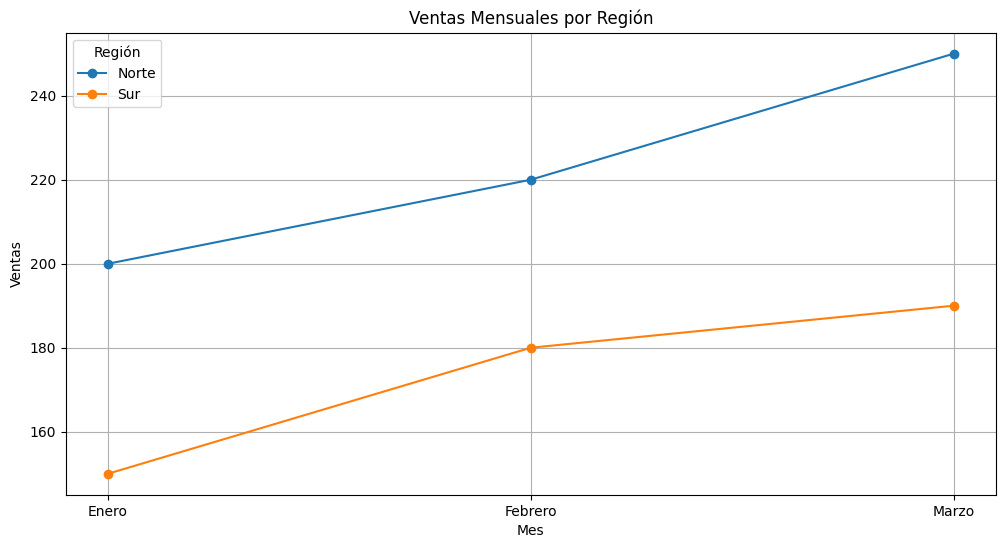

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear un DataFrame con múltiples índices
index = pd.MultiIndex.from_tuples([
    ('Enero', 'Norte'), ('Enero', 'Sur'),
    ('Febrero', 'Norte'), ('Febrero', 'Sur'),
    ('Marzo', 'Norte'), ('Marzo', 'Sur')
], names=['Mes', 'Región'])

data = {
    'Ventas': [200, 150, 220, 180, 250, 190]
}

df = pd.DataFrame(data, index=index)
print(df)

# Crear la figura y los ejes
plt.figure(figsize=(12, 6))

# Extraer los datos para cada región
for region in df.index.get_level_values('Región').unique():
    subset = df.xs(region, level='Región')
    plt.plot(subset.index.get_level_values('Mes'), subset['Ventas'], label=region, marker='o')

# Añadir títulos y etiquetas
plt.title('Ventas Mensuales por Región')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.legend(title='Región')
plt.grid(True)
plt.show()


Ejercicio Adicional **(Evaluacion)**
Para profundizar más en el análisis, puedes intentar lo siguiente: haga de cuenta que usted es vendedor de un concesionario de vehiculos de varias marcas

cree el siguiente dataframe y siga adelante con el desarrollo de la actividad


index = pd.MultiIndex.from_tuples([
    ('2022', 'Toyota'), ('2022', 'Ford'), ('2022', 'Honda'),
    ('2023', 'Toyota'), ('2023', 'Ford'), ('2023', 'Honda'),
    ('2024', 'Toyota'), ('2024', 'Ford'), ('2024', 'Honda')
], names=['Año', 'Marca'])


data = {
    'Ventas': [150, 120, 130, 160, 110, 140, 170, 100, 150]
}

df = pd.DataFrame(data, index=index)
print(df)



*   Agregar Más Datos: Incluye más años y marcas para tener un conjunto de datos más amplio.
*   Modificar el Tipo de Gráfico: Experimenta con gráficos de barras o gráficos de áreas para diferentes perspectivas sobre los datos.
*   ***Análisis Avanzado: Realiza un análisis más detallado como el cálculo de tasas de crecimiento anual o la comparación de ventas entre marcas de vehiculos específicas.***

